In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os, glob

# Применение модуля аугментации табличных данных

Что хотелось бы добавить:
* Получение/единообразное оформление признаков
* Аугментация
* Получение агрегаций признаков
* Получение предсказания красного смещения
* Нормализация данных
* Работа с пропусками
* Построение промежуточных графиков

На данный момент есть получение признаков + аугментация

In [5]:
import classificationSGQ.augmentations as aug

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/process_counterparts.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
# Целевая выборка, чбе распределение хотим повторить 
train_data = pd.read_pickle(os.path.join(aug.train_data_path, aug.train_features), compression='gzip')
# Выборка для аугментации с полученными признаками
# input_data = pd.read_pickle('data/rename_x1_class.pkl_gz', compression='gzip')
input_data = pd.read_pickle('data/input.gz_pkl', compression='gzip')

In [93]:
# При несовпадении названий для квазаров
# input_data = aug.change_coord(input_data)

KeyError: "['gaiaedr3_parallax', 'gaiaedr3_parallax_error', 'gaiaedr3_pmra', 'gaiaedr3_pmra_error', 'gaiaedr3_pmdec', 'gaiaedr3_pmdec_error'] not in index"

In [5]:
input_data

,nrow,objID,ra,dec,zspec,class,fold,sdss_objID,ps_objID,ls_objid,...,gaiaedr3_pmra,gaiaedr3_pmra_error,gaiaedr3_pmdec,gaiaedr3_pmdec_error,gaiaedr3_phot_g_mean_flux,gaiaedr3_phot_bp_mean_flux,gaiaedr3_phot_rp_mean_flux,gaiaedr3_phot_g_mean_flux_error,gaiaedr3_phot_bp_mean_flux_error,gaiaedr3_phot_rp_mean_flux_error
0,765558,166771828504836546,182.850396,48.979910,0.046132,3,0,1237658203437138069,166771828504836546,1240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,3,0,1237667323259977790,140921926169192374,966.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,3,0,1237661137423564948,153541551169831903,1053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,3,0,1237658493355491395,120741855100415434,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,3,0,1237658297923993774,114671598619635888,3211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,1,0,b'1237668503831839169',168942520832350614,2524.0,...,4.507051,1.006361,-10.862017,2.142640,94.754036,79.422267,35.679947,0.917944,8.554550,7.448574
60415,960360,1237665583790752642,252.201060,50.891273,NaN,1,1,b'1237665583790752642',169072522010270251,269.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,1,0,b'1237665584327361688',170052523581551162,1624.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,1,0,b'1237665584327164382',170582521281637776,608.0,...,0.372270,0.774939,-0.076599,0.873470,108.694755,64.657402,70.259945,0.835717,6.490492,7.248527


Имеем входную выборку и выборку для обучения моделей аугментации \
Для входной выборки не хватет несколько признкаов (не соответствие признаков для галактик и квазаров), поэтому мы будем получать их отдельно:

In [7]:
catalog = aug.Catalog(None, ('ra', 'dec'),
                      njobs=24, output_dir='data/input_aug',
                      assembled_dataset_path=os.path.join('data/input.gz_pkl'),
                      filename='input')
catalog.prepare_data(augmentation=False)

('raBest', 'decBest')
===== Defined use case: 4 =====
Use case 4
Use case prepare_features
===== False =====


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/pzph1dot1.py:1465: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/predictionsZ/pzph1dot1.py:1489: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

'Done'

In [22]:
aug_model = aug.Augmentation(debug=False)

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:151: UserWarning:

path_to_models is not define. Will be used ./AugModel



In [30]:
aug_model.train(train_data) # Можно передать DataFrame или название файла

In [31]:
features = 'decals8tr_z'

### Аугментация

In [94]:
version = 'one_gauss' # (Первый тип)

In [ ]:
path_buf = '/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm'

./tmp_out/__buf__ exists
CLASS = 1


/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:80: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/classificationSGQ/augmentations.py:81: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up th

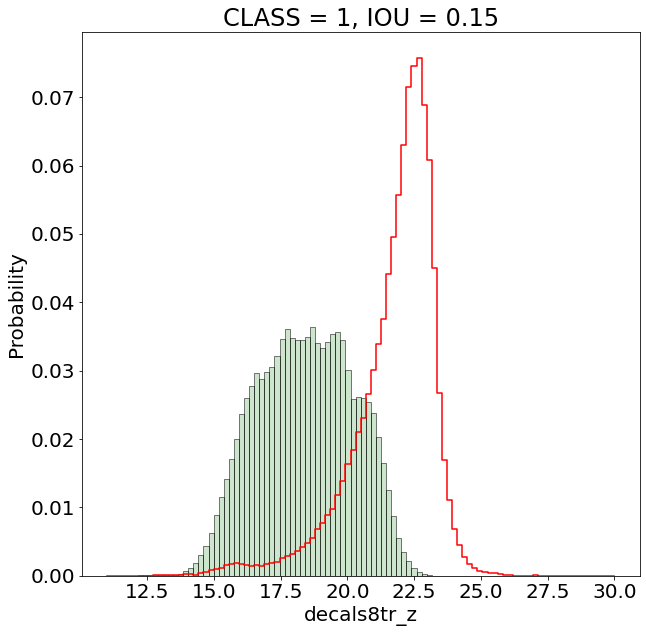

type_model 1
use_def_statistic -- decals8tr_z
mu = 3.8874999999999993, sigma = 0.0
count iter = 1
i = 0


KeyboardInterrupt: 

In [54]:
aug.predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, plot=True, return_data=False)

In [64]:
df_after = aug.read_after_augm(path='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm', version=version)

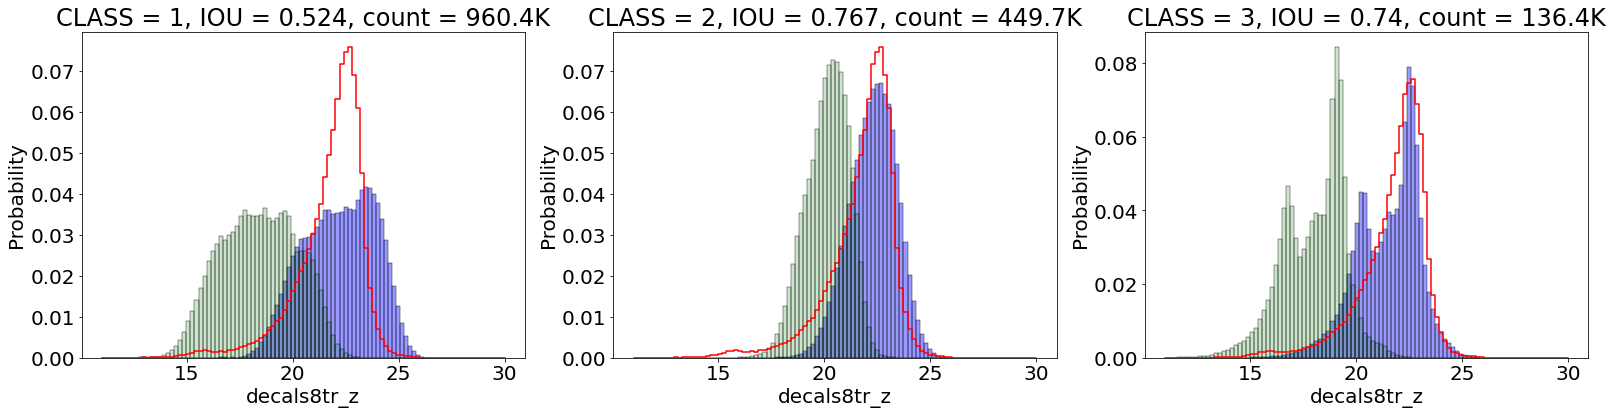

In [82]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, metric='IOU')

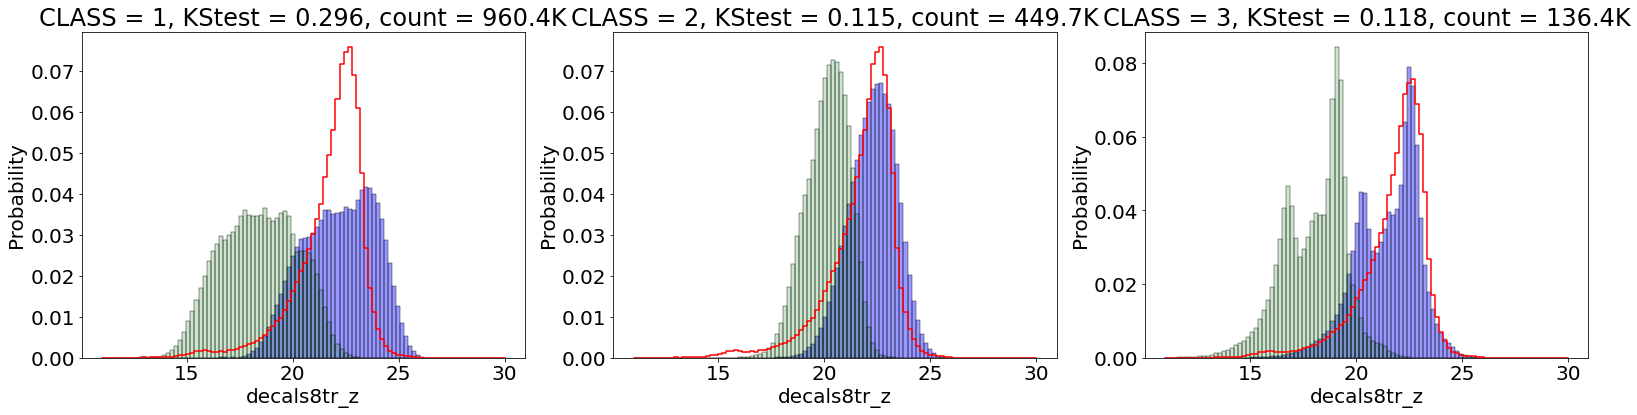

In [83]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version=version, path_buf=path_buf, metric='KStest')

In [ ]:
df_after = pzph_predict_SGQ(version=version, path_buf=path_buf)

In [31]:
f, axes = plt.subplots(ncols = 3, figsize=(24, 5), sharex=True)
aug.plt_version('train', 'zoo_best_z_max', features, ax=axes[0], path_to_files='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/data/')
norm = aug.plt_version('before_all', 'zoo_best-x1_z_max', features, ax=axes[1])
for i, file in enumerate(list(glob.glob(os.path.join(path_buf, f'preds_{version}/df_augg_cls_*{version}*features.gz_pkl')))):
#     print(i, file)
    f = file.split('/')[-1]
    aug.plt_version(f"{file.split('/')[-1].split('.')[0]}", 'zoo_best-x1_z_max', features, ax=axes[2], path_to_files=os.path.join(path_buf, f'preds_{version}/end'), norm=norm, title=version, colorbar=(i==0))

[autoreload of classificationSGQ.study_model failed: Traceback (most recent call last):
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/nmalysheva/.conda/envs/nadya/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line

NameError: name 'plt' is not defined

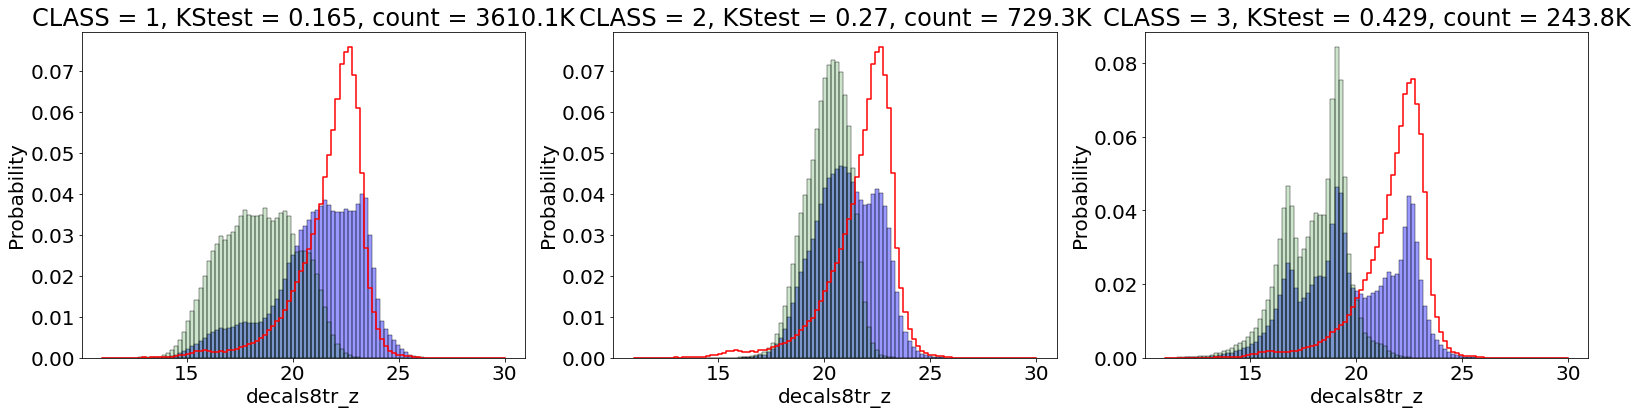

In [84]:
aug.plt_predict_SGQ(aug_model, input_data, features=features, version='optimization', path_buf='/home/nmalysheva/task/S-G-Q_DESI+PanSTARRS+SDSS+WISE+J_UHS/pzph/all_from_local/output_augm', metric='KStest')

# Применения модуля обучения и применения моделей

Что хотелось бы видеть:
* Обучение моделей на данных (автоматический подбор гиперпараметров)
* Отбор признаков
* Построение интерпретации

In [7]:
from classificationSGQ import study_model as SGQ
version = 'one_gauss'

In [16]:
version = 'one_gauss'
df_after = aug.read_after_pzph_predict(f'./pzph/all_from_local/output_augm/preds_{version}/end', version)

['./pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_2_one_gauss_3_part-00003.features.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_2_one_gauss_3_part-00003.best.x1.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_2_one_gauss_3_part-00003.predictions.x1.gz_pkl']
['./pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_3_one_gauss_3_part-00000.features.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_3_one_gauss_3_part-00000.best.x1.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_3_one_gauss_3_part-00000.predictions.x1.gz_pkl']
['./pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_1_one_gauss_3_part-00000.features.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_1_one_gauss_3_part-00000.predictions.x1.gz_pkl', './pzph/all_from_local/output_augm/preds_one_gauss/end/df_augg_cls_1_one_gauss_3_part-00000.best.x1.g

In [20]:
df_after.merge(input_data[['nrow', 'objID', 'ra', 'dec', 'zspec', 'class', 'fold']+SGQ.gaia_features], how='left', on=['nrow', 'objID', 'ra', 'dec', 'zspec', 'class']).to_pickle(f'./data/{version}.gz_pkl')

In [8]:
df_after = aug.Catalog.read_table(f'./data/{version}.gz_pkl')

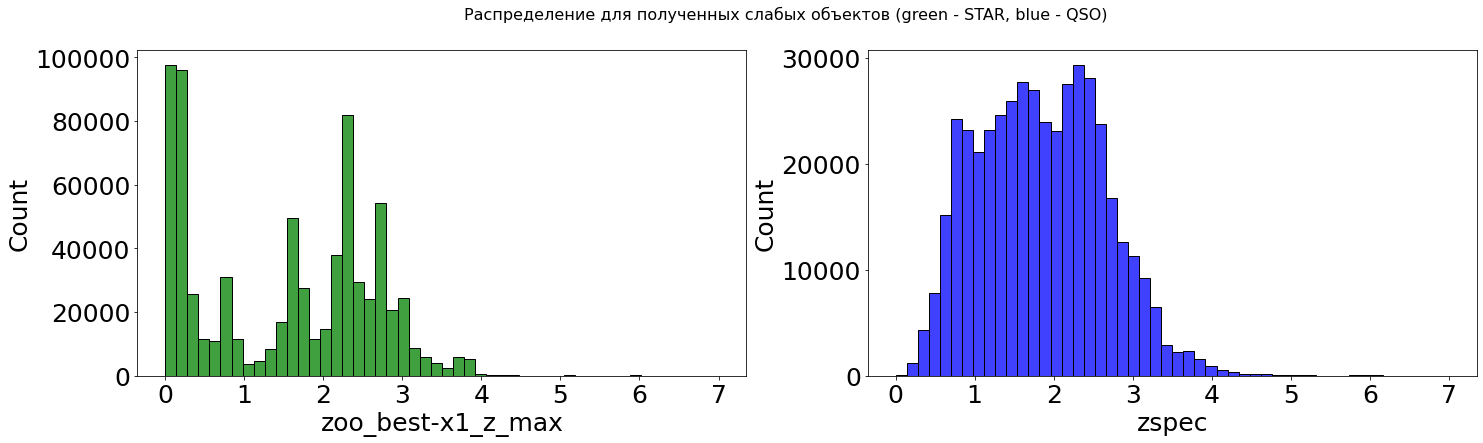

STAR 960363 
QSO 449748 
GALAXY 136428


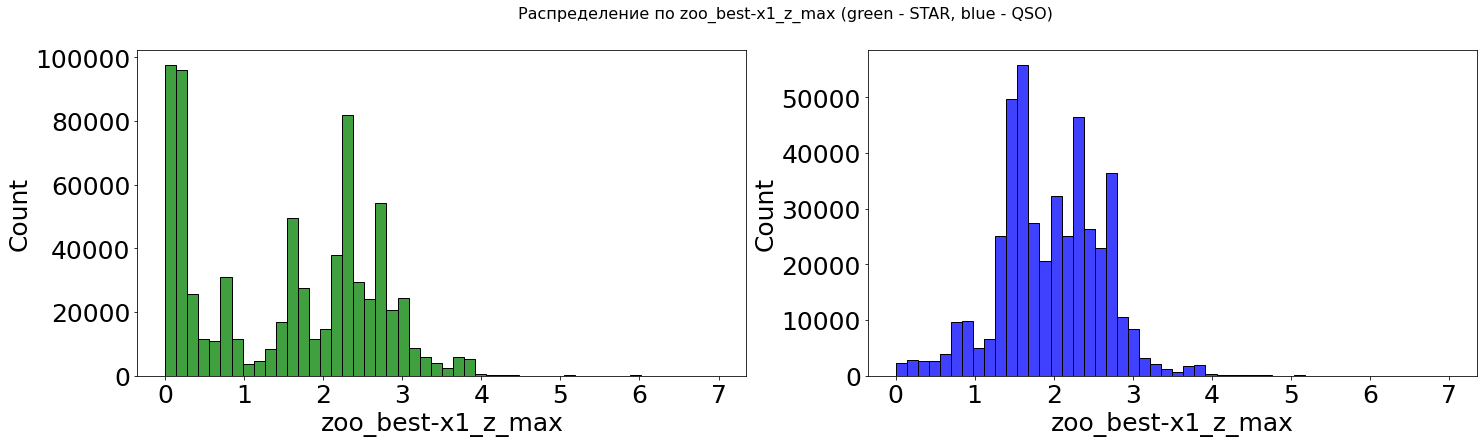

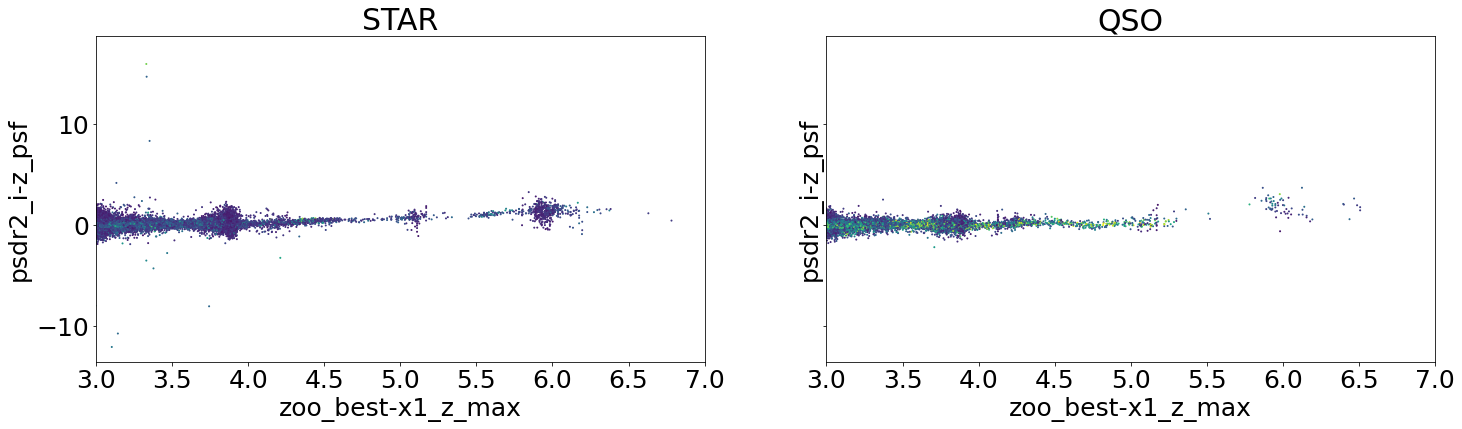

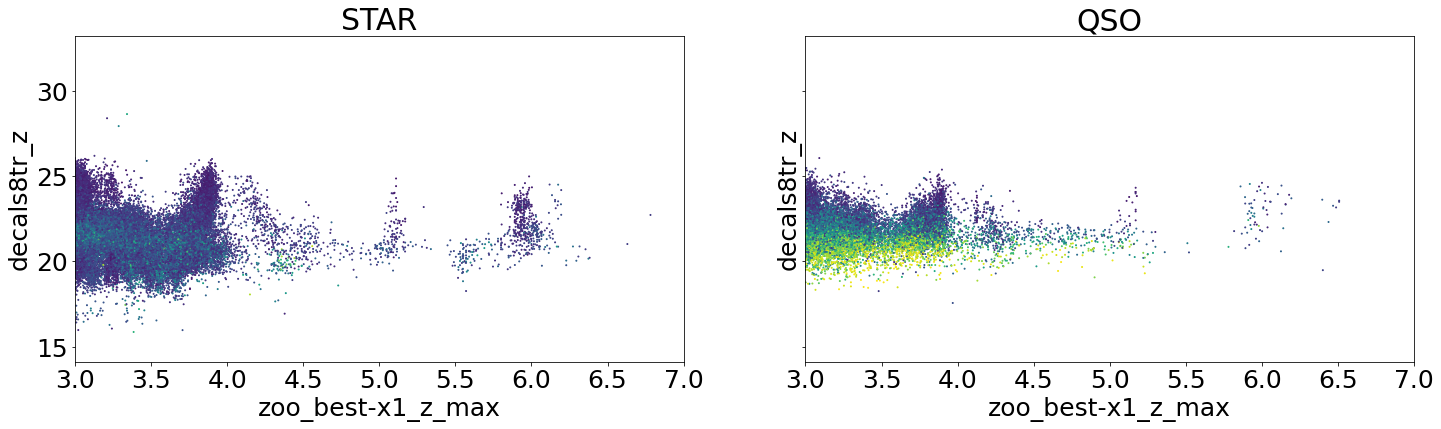

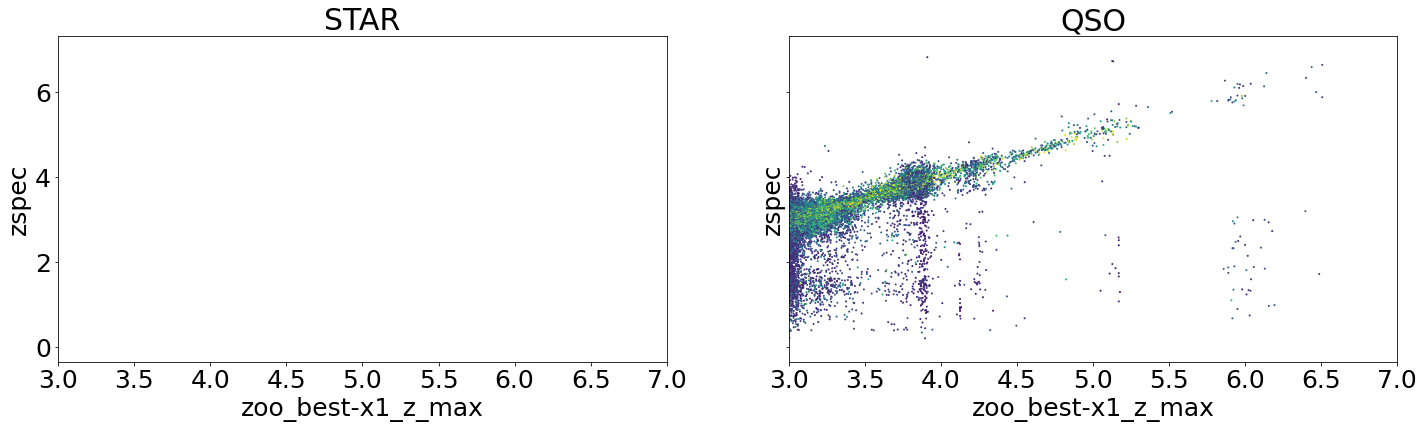

In [28]:
SGQ.report_plots(df_after)

In [30]:
SGQ.train_classifier_SGQ(df_after, version=version)

Директория ./models/one_gauss/models_0/not_j уже существует
sdssdr16+wise_decals8tr
30
(574853, 31) (143715, 31)
100%|██████████| 50/50 [20:47<00:00, 24.94s/trial, best loss: -0.9093994460550822]
({'colsample_bytree': 0.7371313393173896, 'min_child_samples': 69, 'num_leaves': 21, 'subsample_freq': 2}, <hyperopt.base.Trials object at 0x7f9b0ac24610>)
11.112207174301147
0.9099050203527815
./models/one_gauss/models_0/not_j/model_sdssdr16+wise_decals8tr.pkl
psdr2+wise_decals8tr
29
(524254, 30) (131064, 30)
100%|██████████| 50/50 [20:25<00:00, 24.52s/trial, best loss: -0.9270391837218132]
({'colsample_bytree': 0.30336182045614385, 'min_child_samples': 76, 'num_leaves': 57, 'subsample_freq': 17}, <hyperopt.base.Trials object at 0x7f9b10633b10>)
8.612186670303345
0.9269822376854056
./models/one_gauss/models_0/not_j/model_psdr2+wise_decals8tr.pkl
sdssdr16+all_decals8tr
39
(572126, 40) (143033, 40)
100%|██████████| 50/50 [24:31<00:00, 29.42s/trial, best loss: -0.9318087287277961]
({'colsample_b

In [80]:
model = SGQ.SGQModel(version=version)

In [48]:
pred = model.predict(df_after, train=True)
proba = model.predict_proba(df_after, train=True)
pred_gaia = model.predict_gaia(df_after)

sdssdr16+wise_decals8tr
psdr2+wise_decals8tr
sdssdr16+all_decals8tr
psdr2+all_decals8tr
decals8tr
sdssdr16+psdr2+wise_decals8tr
sdssdr16+psdr2+all_decals8tr
sdssdr16+wise_decals8tr
psdr2+wise_decals8tr
sdssdr16+all_decals8tr
psdr2+all_decals8tr
decals8tr
sdssdr16+psdr2+wise_decals8tr
sdssdr16+psdr2+all_decals8tr


In [9]:
model = SGQ.SGQModel(version=version)
model.fold_name = 'fold_x'
res_aug = model.test_table(df_after)
model.fold_name = 'fold'
res_input = model.test_table(input_data)

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted wit

KeyError: "['psdr2_g-i_psf', 'psdr2_g-y_psf', 'psdr2_r-i_psf', 'psdr2_r-y_psf', 'psdr2_i-z_psf', 'psdr2_i-y_psf', 'psdr2_i_psf-kron', 'psdr2_z-y_psf', 'psdr2_y_psf-kron', 'psdr2_g_kron-decals8tr_Lw1', 'psdr2_g_kron-decals8tr_Lw2', 'psdr2_r_kron-decals8tr_Lw1', 'psdr2_r_kron-decals8tr_Lw2', 'psdr2_i_kron-decals8tr_Lw1', 'psdr2_i_kron-decals8tr_Lw2', 'psdr2_z_kron-decals8tr_Lw1', 'psdr2_z_kron-decals8tr_Lw2', 'psdr2_y_kron-decals8tr_Lw1', 'psdr2_y_kron-decals8tr_Lw2'] not in index"

In [10]:
res_aug

S                           Q                   \
                     recall   roc-auc   count    recall  roc-auc   count   
data                                                                       
GAIA               0.882519  0.995418   82175  0.983516  0.99503    9767   
sdssdr16_i_psf<20  0.882282  0.995382   83012  0.983516  0.99500    9767   
sdssdr16_i_psf>20  0.859039  0.967710  776976  0.913126  0.97206  435411   

                          G                    
                     recall   roc-auc   count  
data                                           
GAIA               0.983896  0.998751    1304  
sdssdr16_i_psf<20  0.983896  0.998734    1304  
sdssdr16_i_psf>20  0.889133  0.991184  135117

In [ ]:
res_input

In [11]:
model = SGQ.SGQModel(version='big_models')
model.fold_name = 'fold_x'
old_res_aug = model.test_table(df_after)
# model.fold_name = 'fold'
# old_res_input = model.test_table(input_data)

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/pytho

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RobustScaler was fitted without feature names

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning:

Trying to unpickle estimator RobustScaler from version 0.22.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/home/nmalysheva/.conda/envs/nadya/lib/pytho

In [12]:
old_res_aug

S                           Q                    \
                     recall   roc-auc   count    recall   roc-auc   count   
data                                                                        
GAIA               0.998795  0.995090   82175  0.974096  0.994256    9767   
sdssdr16_i_psf<20  0.998675  0.995058   83012  0.974096  0.994234    9767   
sdssdr16_i_psf>20  0.860554  0.815351  776976  0.601423  0.842130  435411   

                          G                    
                     recall   roc-auc   count  
data                                           
GAIA               0.986963  0.998537    1304  
sdssdr16_i_psf<20  0.986963  0.998504    1304  
sdssdr16_i_psf>20  0.170660  0.780807  135117

In [ ]:
old_res_input